In [67]:
# Import Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [68]:
# Import Dataset
file_path = '/Users/MichaelLy/Github Projects/Diabetes Project/Diabetes Dataset.csv'

# Store Dataset
diabetes_data = pd.read_csv(file_path)

# Read Dataframe
diabetes_data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [69]:
# Exploratory Data Analysis
# Summary of the Dataframe
diabetes_data.info()

# Summary Statistics
diabetes_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


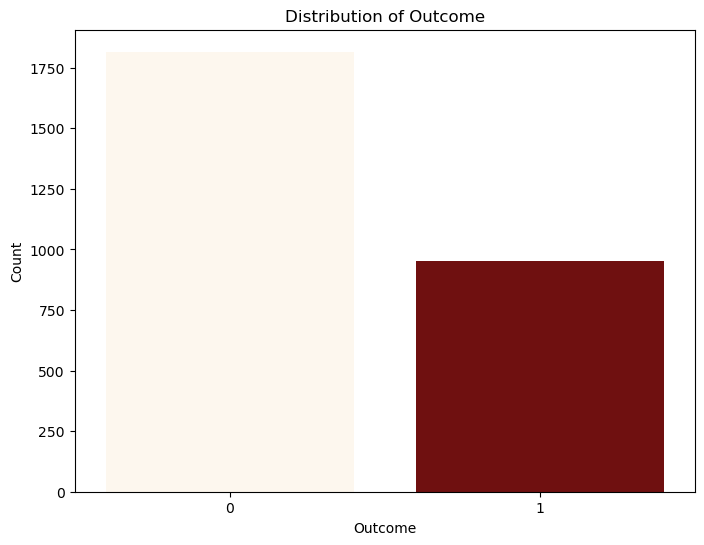

In [70]:
# Distribution of the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=diabetes_data, palette=['#fff7ec', '#7f0000'])
plt.title('Distribution of Outcome')
plt.ylabel('Count')
plt.xlabel('Outcome')
plt.show()

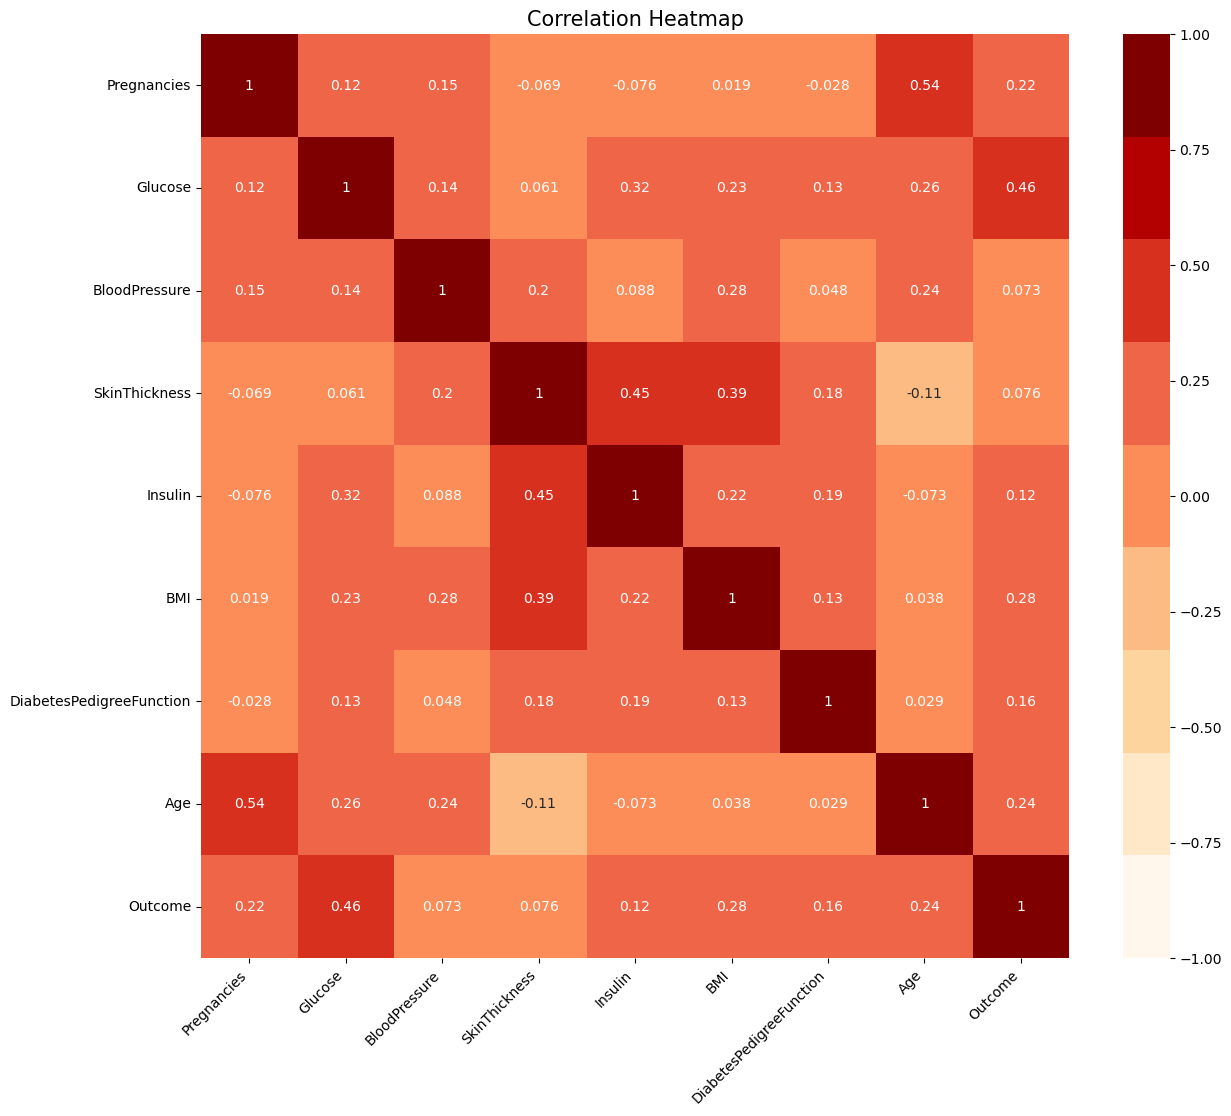

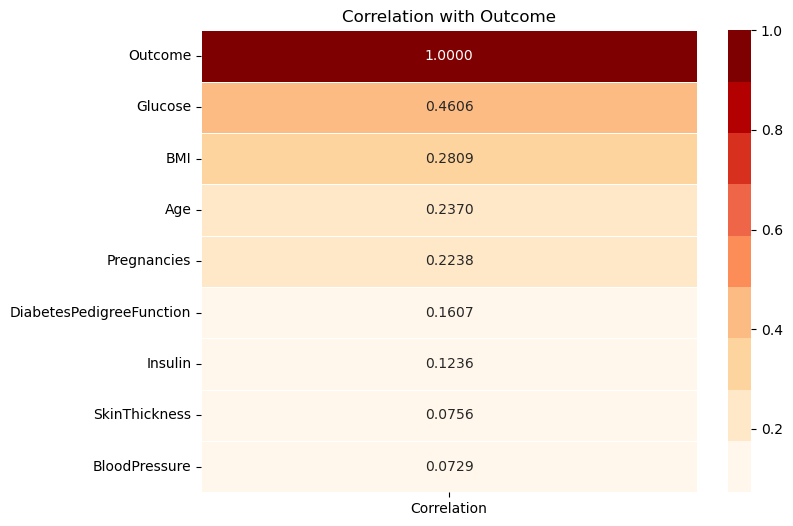

In [71]:
# Dropping the "Id" Column for Correlation Heatmap and Calculating Correlation with the Target Column
data_without_id = diabetes_data.drop(columns=['Id'])

# Defining Custom Color-blind Friendly Color Palette
custom_colors = [
    '#fff7ec', '#fee8c8', '#fdd49e', '#fdbb84',
    '#fc8d59', '#ef6548', '#d7301f', '#b30000', '#7f0000'
]

# Correlation Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(data_without_id.corr(), annot=True, cmap=sns.color_palette(custom_colors, as_cmap=True), vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Heatmap', size=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Correlation with the Target Column
corr = data_without_id.corrwith(data_without_id['Outcome']).sort_values(ascending=False)

# Correlation Heatmap with the Target Column
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr, columns=['Correlation']), annot=True, cmap=sns.color_palette(custom_colors, as_cmap=True), fmt=".4f", linewidths=.5)
plt.title('Correlation with Outcome')
plt.show()

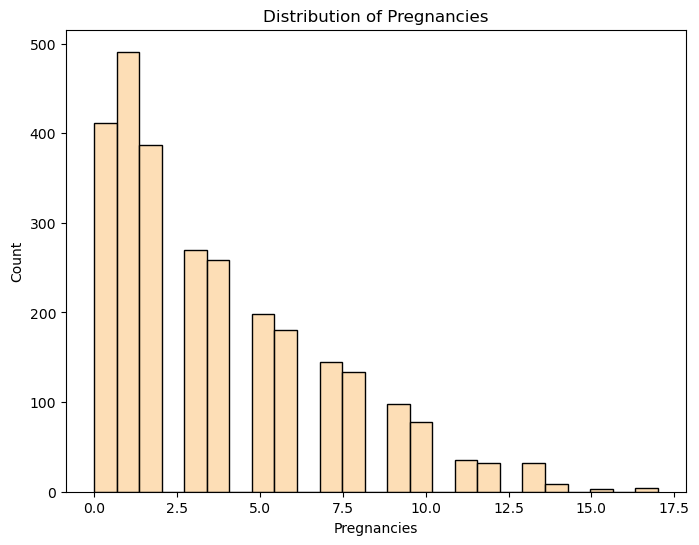

In [72]:
# Distribution of Pregnancies
plt.figure(figsize=(8, 6))
sns.histplot(x=diabetes_data.Pregnancies, bins=25, color='#fdd49e')
plt.title('Distribution of Pregnancies')
plt.show()

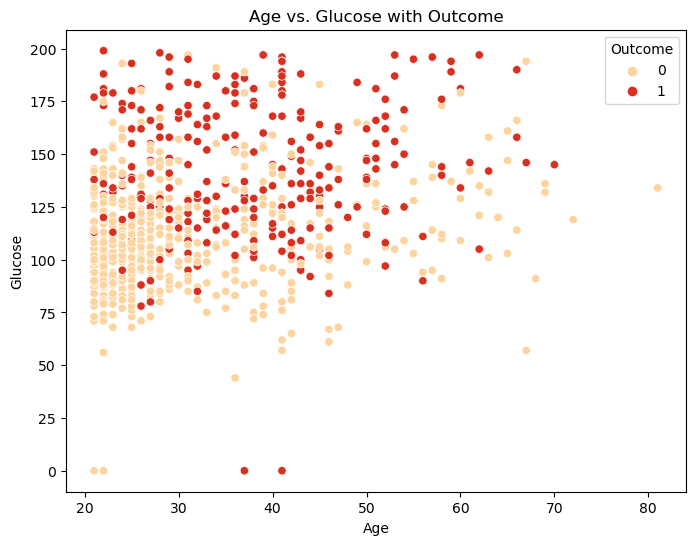

In [73]:
# Relationship between Age and Glucose with Points Colored based on Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=diabetes_data, palette=['#fdd49e', '#d7301f'])
plt.title('Age vs. Glucose with Outcome')
plt.show()

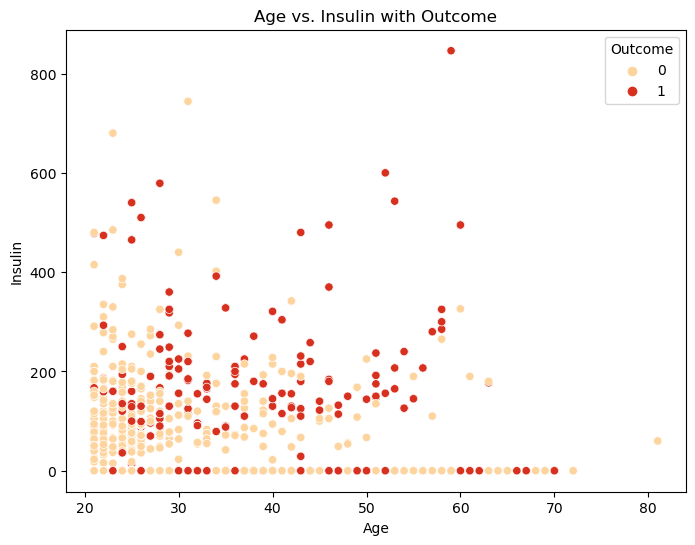

In [74]:
# Relationship between Age and Insulin levels with Points Colored based on Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Insulin", hue="Outcome", data=diabetes_data, palette=['#fdd49e', '#d7301f'])
plt.title('Age vs. Insulin with Outcome')
plt.show()

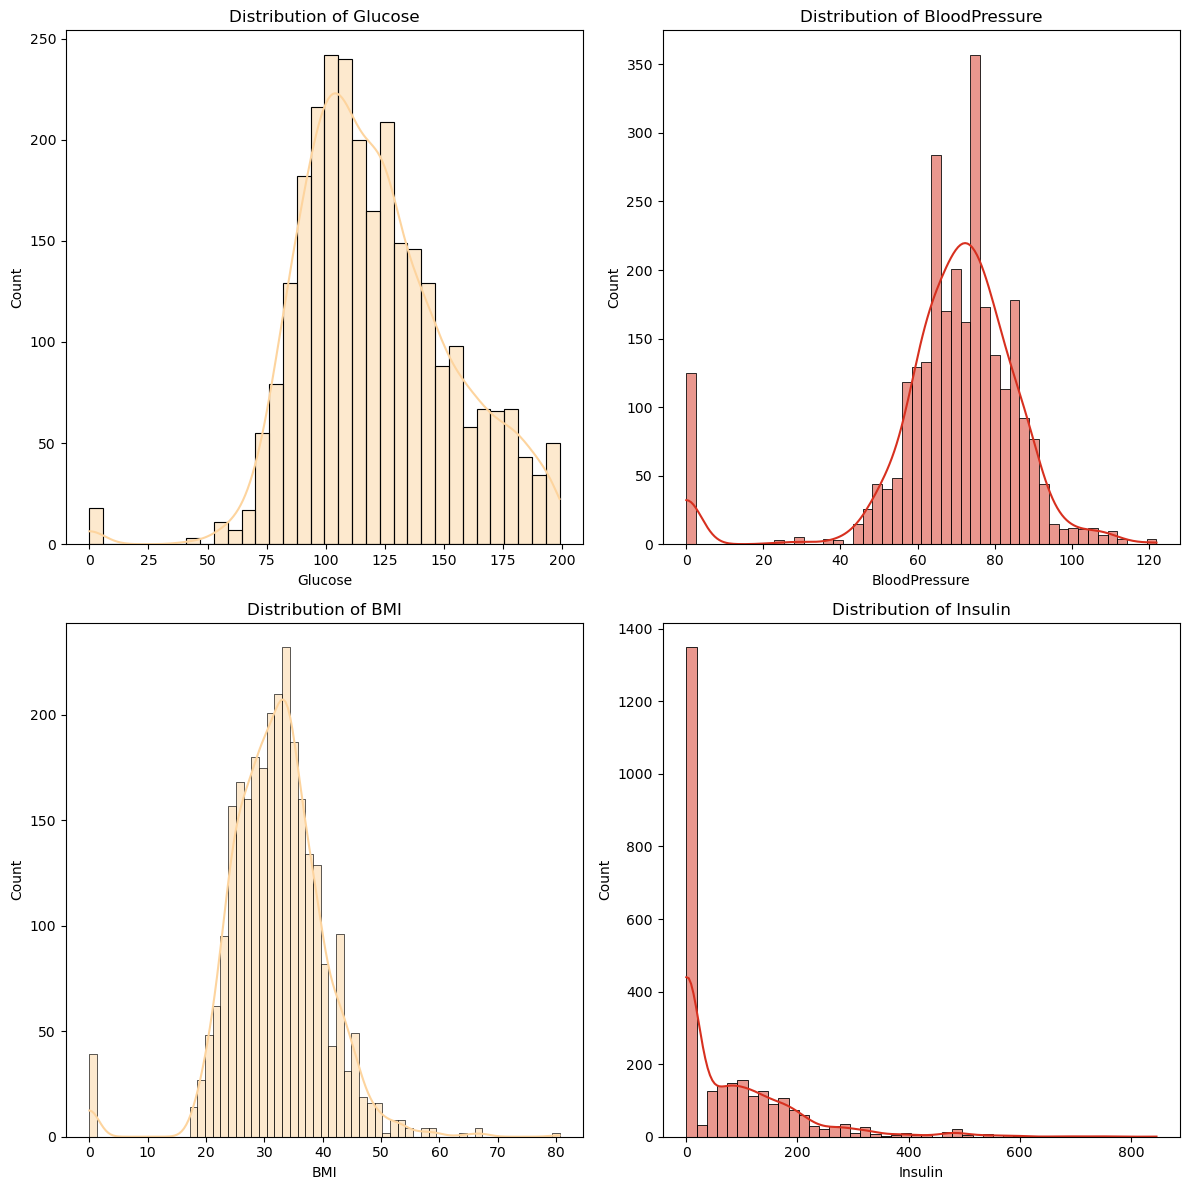

In [75]:
# Distribution of Variables: Glucose, BloodPressure, BMI, and Insulin
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.histplot(diabetes_data['Glucose'], kde=True, color='#fdd49e')
plt.title('Distribution of Glucose')

plt.subplot(2, 2, 2)
sns.histplot(diabetes_data['BloodPressure'], kde=True, color='#d7301f')
plt.title('Distribution of BloodPressure')

plt.subplot(2, 2, 3)
sns.histplot(diabetes_data['BMI'], kde=True, color='#fdd49e')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 4)
sns.histplot(diabetes_data['Insulin'], kde=True, color='#d7301f')
plt.title('Distribution of Insulin')

plt.tight_layout()
plt.show()

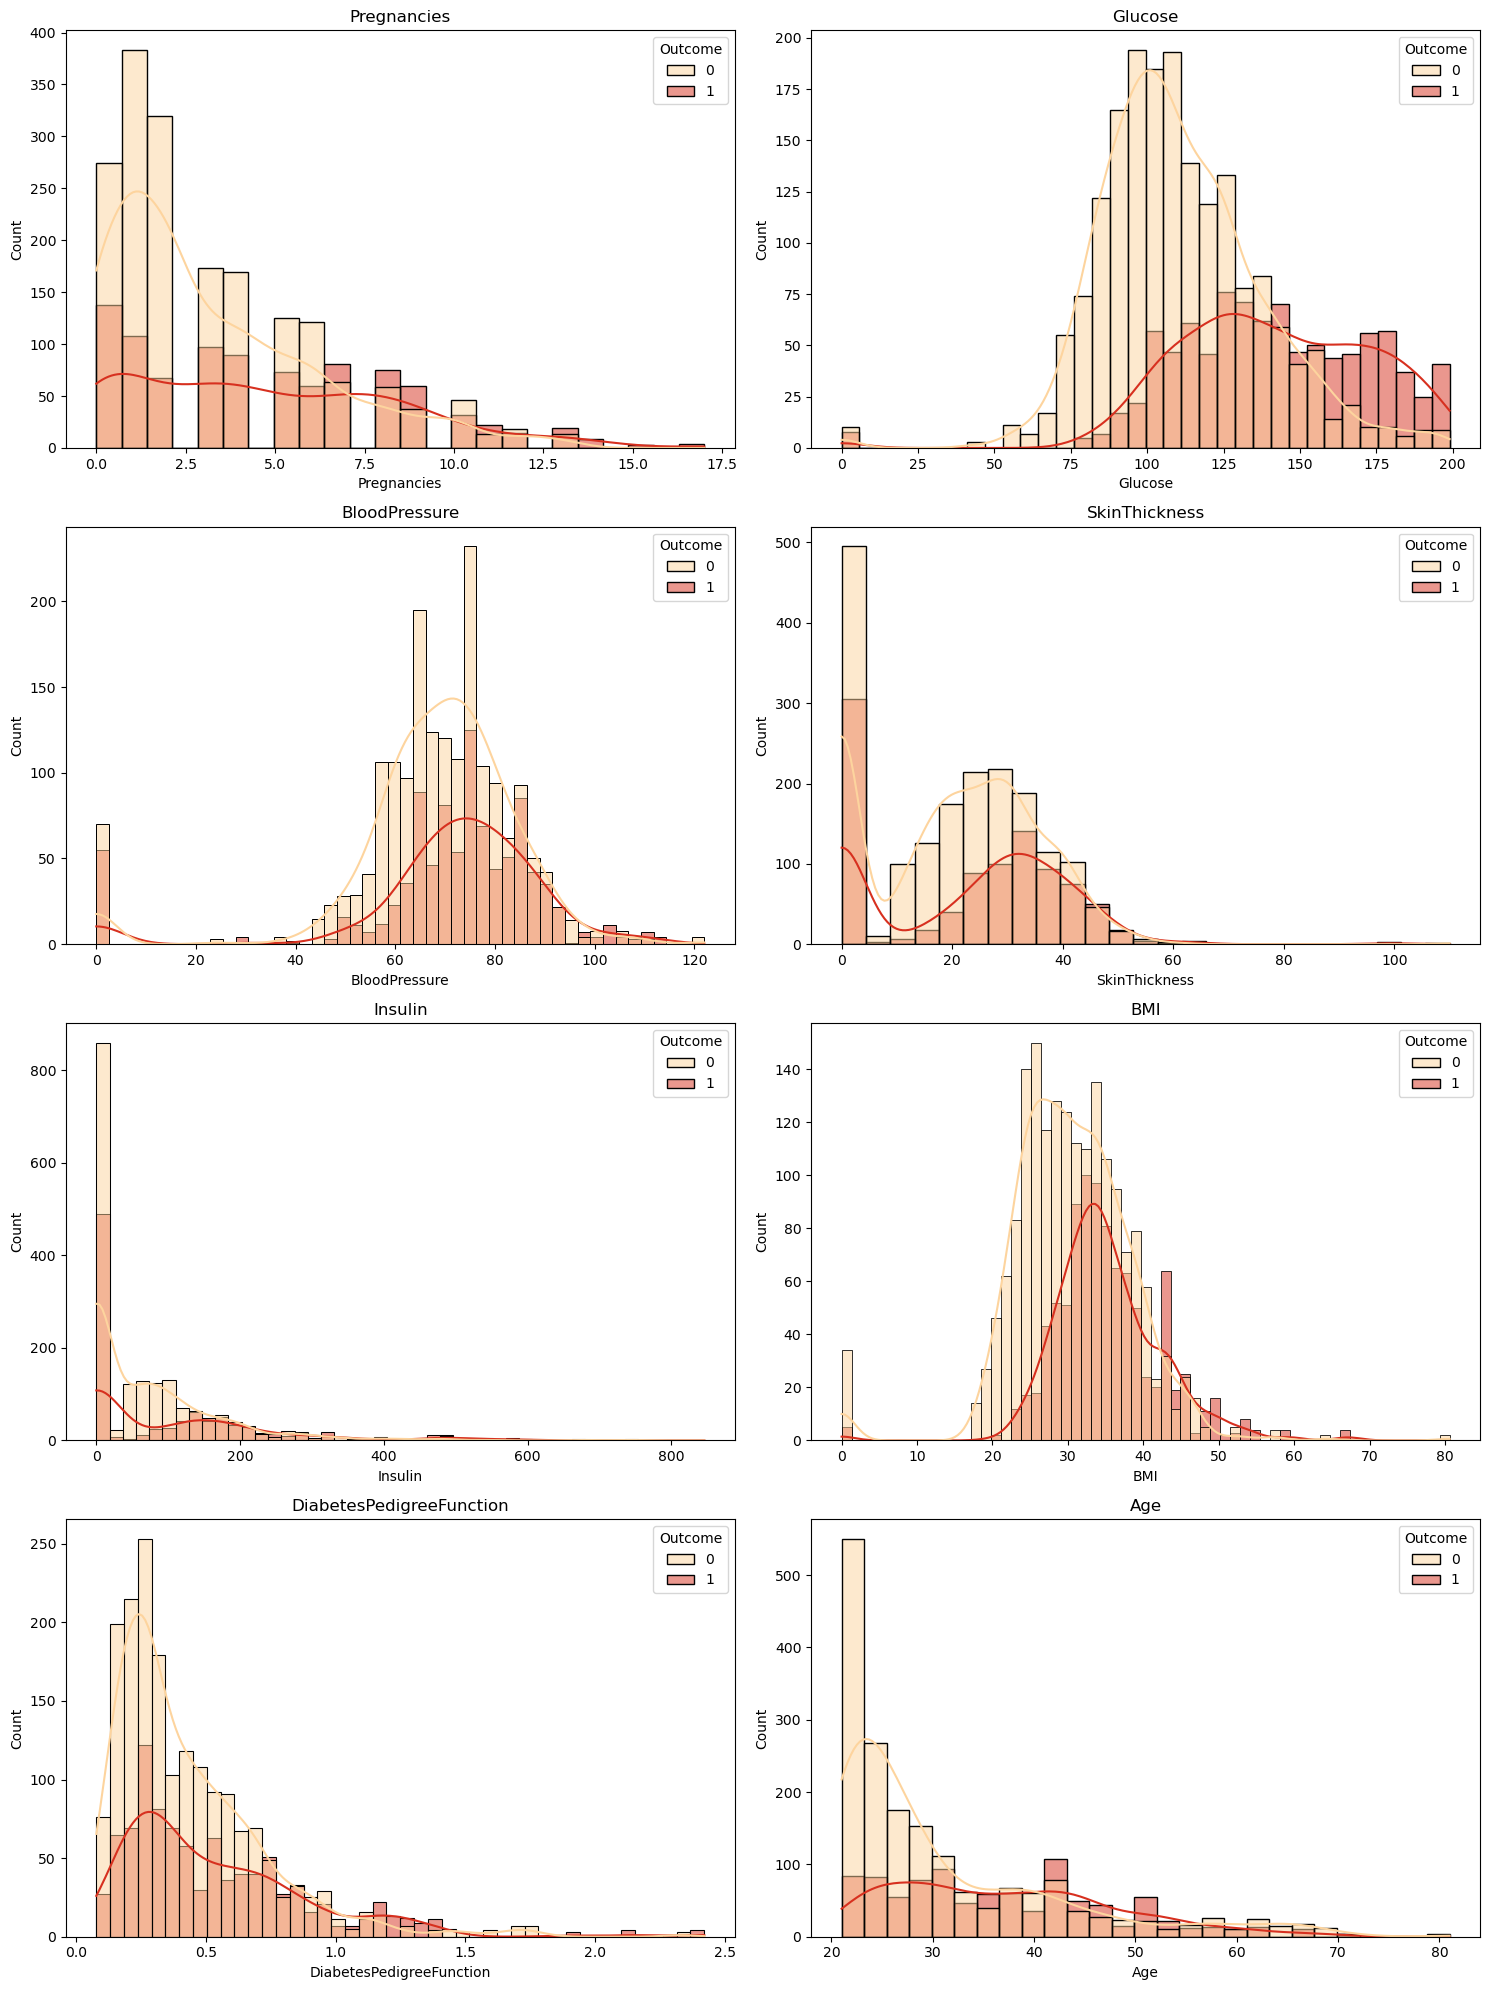

In [76]:
# Distribution of Columns with Target Column "Outcome"
num_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(15, 20))

for i in range(len(num_list)):
    plt.subplot(4, 2, i+1)
    plt.title(num_list[i])
    sns.histplot(data=diabetes_data, x=num_list[i], hue='Outcome', kde=True, palette=['#fdd49e', '#d7301f'])

plt.tight_layout()
plt.show()

In [77]:
# Feature Engineering and Scaling
# Separating Features and Target Variable
X = diabetes_data.drop(columns=['Id', 'Outcome'])
y = diabetes_data['Outcome']

# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

In [78]:
# Model Development and Evaluation
# Initialize Models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train Todels
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation Function
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate Logistic Regression
logreg_results = evaluate_model(y_test, y_pred_logreg)

# Evaluate Decision Tree
dtree_results = evaluate_model(y_test, y_pred_dtree)

# Evaluate Random Forest
rf_results = evaluate_model(y_test, y_pred_rf)

# Combine Results into a DataFrame for Comparison
evaluation_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Logistic Regression': logreg_results,
    'Decision Tree': dtree_results,
    'Random Forest': rf_results
})

print(evaluation_results)

      Metric  Logistic Regression  Decision Tree  Random Forest
0   Accuracy             0.770156       0.978339       0.981949
1  Precision             0.716279       0.981884       0.989091
2     Recall             0.542254       0.954225       0.957746
3   F1 Score             0.617234       0.967857       0.973166
4    ROC AUC             0.715368       0.972542       0.976131


In [ ]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Best Parameters and Best Score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Evaluate the Best Estimator on the Test Set
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
best_rf_results = evaluate_model(y_test, y_pred_best_rf)

print("Evaluation Results of Best Random Forest Model:", best_rf_results)